# Introduction to Optimization 
# Lecture 5: Least squares (Beck Ch. 3)
*MATH 5770/6640 / ME EN 6025, University of Utah*

* See also Amir Beck's lecture notes [here](https://web.iem.technion.ac.il/images/user-files/becka/lec3_least_squares_layers.pdf?58bed9cc).

## Linear Least Squares (Beck Ch. 3.1)
Consider the system
$$
Ax = b 
$$
where $A \in \mathbb R^{m\times n}$ and $b \in \mathbb R^m$. Assume $m \geq n$ and that $\textrm{rank}(A) = n$, *i.e.*, $A$ has full column rank.

If $m = n$, the solution is given by $x^\star = A^{-1}b$.

If $m>n$, the the system is usually inconsistent and we consider the *Least Squares Problem*:
$$
\min_{x \in \mathbb R^n} \ \|Ax - b \|^2.
$$
By Lemma 2.41, there is a strict global minimum point satisfying the *Normal Equations*,
$$
A^t A x^\star = A^t b.
$$

## Example 3.1. 
Solve the inconsistent linear system
\begin{align*} 
x_1 + 2 x_2 &= 0 \\
2 x_1 + x_2 &= 1 \\
3 x_1 + 2 x_2 &= 1
\end{align*}
using the [numpy linear algebra package](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html).

In [1]:
import numpy as np

Define
$$
A = \begin{pmatrix}
1 & 2 \\
2 & 1 \\
3 & 2
\end{pmatrix}
\quad \textrm{and} \quad
b = \begin{pmatrix}
0 \\ 1 \\ 1
\end{pmatrix}. 
$$

In [2]:
A = np.array([[1, 2], [2, 1], [3, 2]])
b = np.array([0, 1, 1])

Solve normal equations 
$$
A^tA x = A^tb
$$
using the numpy [linear solver](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve).

In [3]:
x = np.linalg.solve(A.transpose()@A, A.transpose()@b)
print(x)

SyntaxError: invalid syntax (<ipython-input-3-e47b8a54f7be>, line 1)

Check against the exact solution, 
$$
x^\star = \begin{pmatrix} \frac{15}{26} \\ -\frac{8}{26} \end{pmatrix}.
$$

In [ ]:
x_exact_sol = np.array([15/26, -8/26])
print(np.linalg.norm(x-x_exact_sol))

Does Ax = b? 

We can compute the residual, 
$$
r = Ax - b,
$$ 
and measure the norm.

In [ ]:
r = A@x - b
print(np.linalg.norm(r))

A better (why?) measure of the error is the relative residual, 
$$
\frac{\|r\|}{\|b\|}.
$$

In [ ]:
print(np.linalg.norm(r)/np.linalg.norm(b))

**Question:** Why doesn't $r=0$? 


It is slightly preferable to use the numpy [least squares solver](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq) to compute the solution. 

In [ ]:
x_LS = np.linalg.lstsq(A, b)[0]
print(x_LS)
print(np.linalg.norm(x_LS - x_exact_sol))

## Data Fitting (Beck Ch. 3.2) 
Consider data 
$$
(s_i, t_i), \qquad \textrm{for} \ i = 1,..., m, 
$$
where $s_i \in \mathbb R$ and $t_i \in \mathbb R$. 

Assume that an approximate *affine* relation holds 
$$
t_i \approx x_0 + s_i x_1 , \qquad i = 1,...,m
$$
In vector notation, this is equivalent to 
$$
t = \begin{pmatrix} 1 & s \end{pmatrix} 
\begin{pmatrix} x_0 \\ x_1 \end{pmatrix}. 
$$
We can find a solution using least squares.

Generate some test data.

In [5]:
m = 100
s = np.linspace(0,10,m)
t = 3*s + 5 + np.random.randn(s.shape[0])

Lets use the [`scatter`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) function in matplotlib to plot the generated test data.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

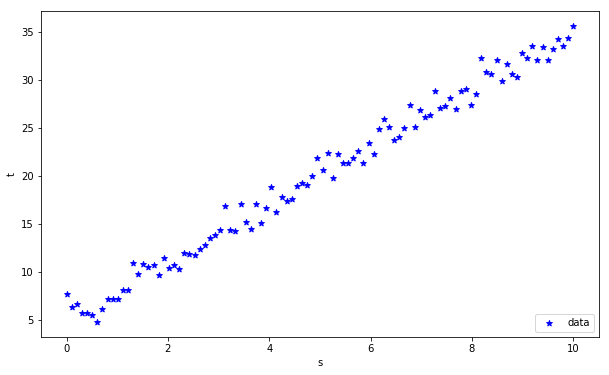

In [7]:
plt.scatter(s,t,c='b',marker='*',label='data')

plt.legend(numpoints=1,loc=4)
plt.xlabel('s')
plt.ylabel('t')
plt.show()

Solve the normal equations to find the best linear fit.

In [15]:
A = np.stack((np.ones(s.shape), s),axis=-1)
#A = np.stack((np.ones(s.shape), np.ones(s.shape), s),axis=-1)

print(A.shape)

x = np.linalg.lstsq(A,t)[0]
print(x.shape)
print('The y-intercept is ', str(x[0]))
print('The slope is ', str(x[1]))

(100L, 2L)
(2L,)
('The y-intercept is ', '5.05392211472')
('The slope is ', '3.01018762289')


Plot the data and best linear fit.

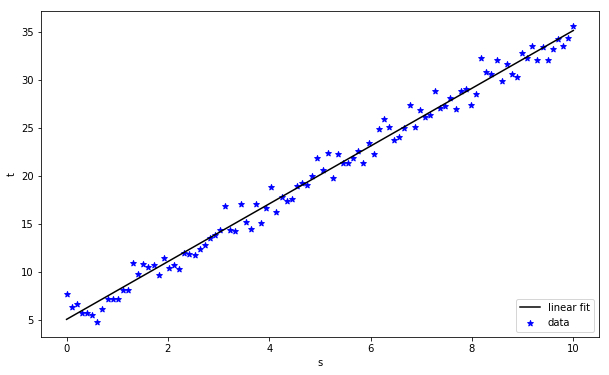

In [16]:
plt.scatter(s,t,c='b',marker='*',label='data')
plt.plot(s,x[0]+x[1]*s,c='k',label='linear fit')

plt.legend(numpoints=1,loc=4)
plt.xlabel('s')
plt.ylabel('t')
plt.show()

## Regularized least squares and denoising (Beck Ch. 3.3 and 3.4)

Here the goal is to denoise a noisy signal b by solving the *regularized least squares problem*,
$$
\min_x  \ \|x-b\|^2 + \lambda R(x).
$$
Here, notice that $A = I$ (the identity) and we have added a second term, called a *regularization term*. The constant $\lambda >0$ is called the regularization parameter. The *regularization function*, $R(x)$ is chosen to "regularize" the solution. 

In this example, we will choose 
$$
R(x) = \| D x \|^2 
$$ 
where $D\in \mathbb R^{p \times n}$ is a given matrix chosen so that the solution is "smoother" than the original data. 

Stationary points of this regularized least squares problem satisfy 
$$
(I + \lambda D^t D) x = b. 
$$
When does a solution exist? (HW)

Generate and plot some noisy data

In [ ]:
n = 200;
t = np.linspace(0,4,n)
x = np.sin(t) + t*pow(np.cos(t),2)
b = x + 0.05*np.random.randn(n)

plt.plot(t,x,c='k',label='signal')
plt.plot(t,b,c='b',marker='.',label='sampled signal with noise')
plt.xlabel('t')
plt.legend(numpoints=1,loc=4)
plt.show() 

We will solve a regularized least squares problem to try to recover the signal from the noisy data. 

**Question:** How should we choose the matrix $D$?

If we assume that the data is "smooth" then this means that the difference between consecutive data points is small. We can take 
$$
R(x) = \sum_{i=1}^{n-1} (x_{i+1} - x_i)^2 = \| D x \|^2
$$
where $D \in \mathbb R^{(n-1)\times n}$ is the matrix
$$
D = \begin{pmatrix}
1 & -1 & 0 & 0 & \cdots & 0 & 0 \\
0 & 1 & -1 & 0 & \cdots & 0 & 0 \\
0 & 0 & 1 & -1 & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & & \vdots & \vdots \\
0 & 0 & 0 & 0 & \cdots & 1 & -1 
\end{pmatrix}.
$$
We will construct this matrix using the [`sparse`](https://docs.scipy.org/doc/scipy/reference/sparse.html) function in scipy.

In [ ]:
import scipy as sp
from scipy import sparse

D = sp.sparse.diags([np.ones(n-1), -np.ones(n-1)], [1, 0],shape=[n-1,n], format="csr")
print(D.toarray())

In [ ]:
lambdas = np.array([1, 10, 100, 1000])
x_rls = np.zeros([n,lambdas.shape[0]])

DtD = D.transpose()@D
for ii in np.arange(lambdas.shape[0]):
    x_rls[:,ii] = np.linalg.solve(np.eye(n) + lambdas[ii]*DtD,b)
    
print(x_rls)

In [ ]:
plt.figure(figsize=(12, 11))
for ii in np.arange(lambdas.shape[0]):
        ax = plt.subplot(2, 2, ii+1)        
        ax.plot(t,b,c='b',marker='.',label='noisy signal')
        ax.plot(t,x_rls[:,ii],c='r',label='regularized fit')
        ax.set_title('lambda='+str(lambdas[ii]))
        plt.legend(numpoints=1,loc=4)
plt.show()

Here the choice of regularization parameter $\lambda=10$ gives a good solution. Let's plot the original sample and compare to the regularized fit.

In [ ]:
plt.plot(t,x,c='k',label='signal')
#plt.plot(t,b,c='b',marker='.',label='sampled signal with noise')
plt.plot(t,x_rls[:,1],c='r',label='regularized fit')
plt.xlabel('t')
plt.legend(numpoints=1,loc=4)
plt.show() 

## Denoising an image
The same idea of denoising a signal also works for images. Let's consider the following grayscale image of a cameraman. 

Here, the image is stored as a matrix with entries between 0 and 1.

In [ ]:
from skimage import data, color, img_as_float

image = img_as_float(data.camera()[::2,::2])
print(image)

plt.imshow(image,cmap=plt.cm.gray)
plt.show()

We add noise to the image using the 
[`random_noise`](http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise) 
function from 
[scikit-image](https://scikit-image.org/).


In [ ]:
from skimage.util import random_noise

noisy_image = random_noise(image, var=0.02)
plt.imshow(noisy_image,cmap=plt.cm.gray)
plt.show()

We denoise this image by solving the *regularized least squares problem*,
$$
\min_x  \ \|x-b\|^2 + \lambda\| D x \|^2 .
$$
Now the matrix $D$ is more difficult to construct. We use the [Kronecker product](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.kron.html). 

In [ ]:
n = image.shape[0]
I = sparse.identity(n)
D = sparse.diags([np.ones(n-1), -np.ones(n-1)], [1, 0],shape=[n-1,n], format="csr")
D2 = sparse.kron(I,D) + sparse.kron(D,I)

As before, we solve the regularized least squares problem, 
$$
(I + \lambda D^t D) x = b. 
$$
We choose the parameter $\lambda = \frac{1}{2}$. 

In [ ]:
A = sparse.identity(n**2) + .5*D2.transpose()@D2
RHS = np.reshape(noisy_image,[n**2,1])

image_denoised = sp.sparse.linalg.spsolve(A,RHS)
image_denoised = np.reshape(image_denoised,[n,n])

plt.imshow(image_denoised,cmap=plt.cm.gray)
plt.show()

There are more sophisticated methods for image denoising, still based on optimization! For example, we can use the [`denoise_tv_chambolle`](http://scikit-image.org/docs/dev/api/skimage.restoration.html#skimage.restoration.denoise_tv_chambolle) function from scikit-image to denoise this image. 

In [ ]:
from skimage.restoration import denoise_tv_chambolle

image_denoised_tv = denoise_tv_chambolle(noisy_image, weight=0.1)
plt.imshow(image_denoised_tv,cmap=plt.cm.gray)
plt.show()

See [this scikit-image page](http://scikit-image.org/docs/dev/auto_examples/filters/plot_denoise.html) for other denoising methods and more information.